In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/sample_data/california_housing_train.csv')

In [3]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0

In [5]:
df.shape

(17000, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [61]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  17000.000000  17000.000000        17000.000000  17000.000000   
mean    -119.562108     35.625225           28.589353      7.635028   
std        2.005166      2.137340           12.586937      0.741253   
min     -124.350000     32.540000            1.000000      1.098612   
25%     -121.790000     33.930000           18.000000      7.288244   
50%     -118.490000     34.250000           29.000000      7.662938   
75%     -118.000000     37.720000           37.000000      8.055872   
max     -114.310000     41.950000           52.000000     10.543709   

       total_bedrooms    population    households  median_income  \
count    17000.000000  17000.000000  17000.000000   17000.000000   
mean         6.058847      7.028796      5.988784       0.913720   
std          0.720890      0.730782      0.721585       0.144162   
min          0.693147      1.386294      0.693147       0.340321   
25%          5.697093      6.673298      5.645447       0.820462   
50%          6.075346      7.063048      6.016157       0.921851   
75%          6.475818      7.451242      6.407292       1.012383   
max          8.771215     10.482430      8.713253       1.327763   

       median_house_value  
count        17000.000000  
mean        207300.912353  
std         115983.764387  
min          14999.000000  
25%         119400.000000  
50%         180400.000000  
75%         265000.000000  
max         500001.000000

<Figure size 1000x600 with 0 Axes>

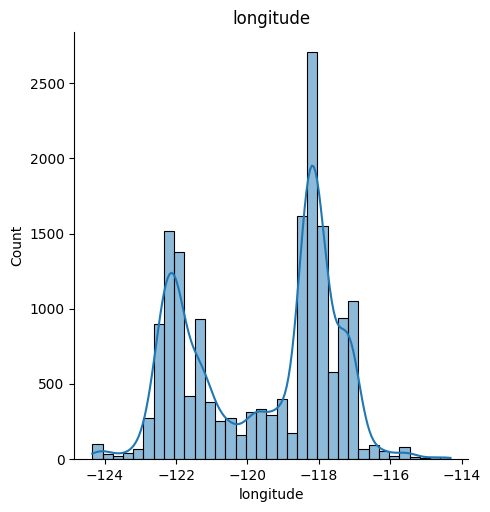

<Figure size 1000x600 with 0 Axes>

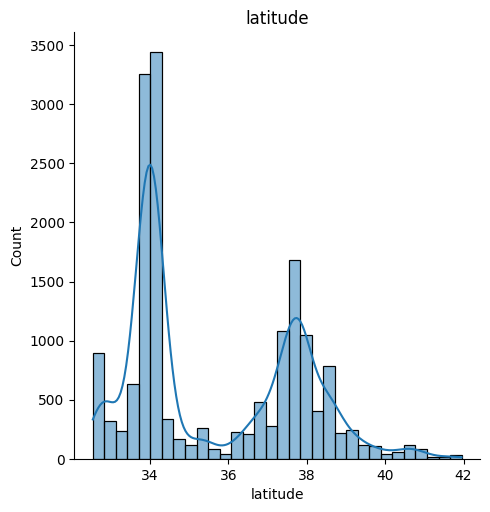

<Figure size 1000x600 with 0 Axes>

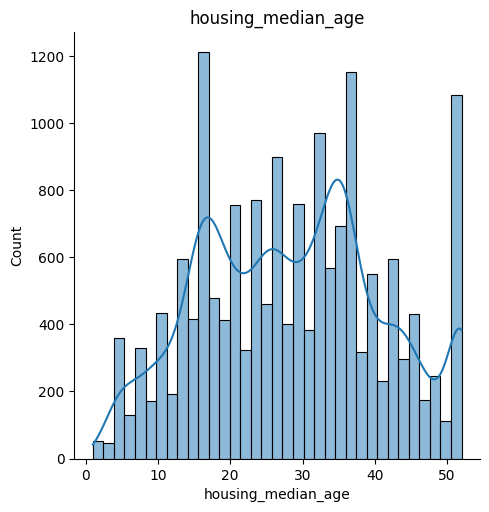

<Figure size 1000x600 with 0 Axes>

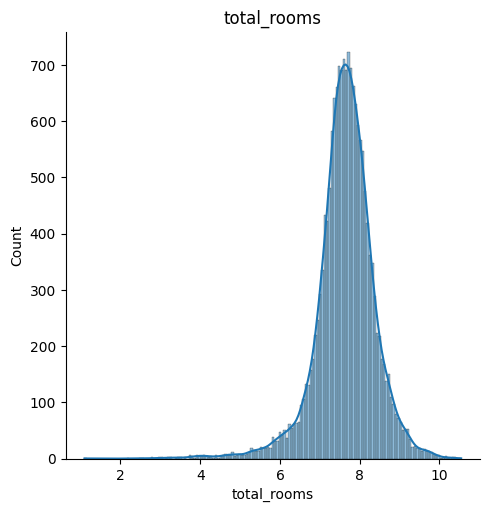

<Figure size 1000x600 with 0 Axes>

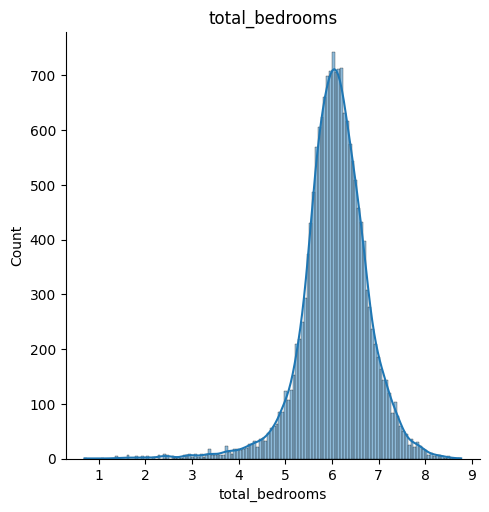

<Figure size 1000x600 with 0 Axes>

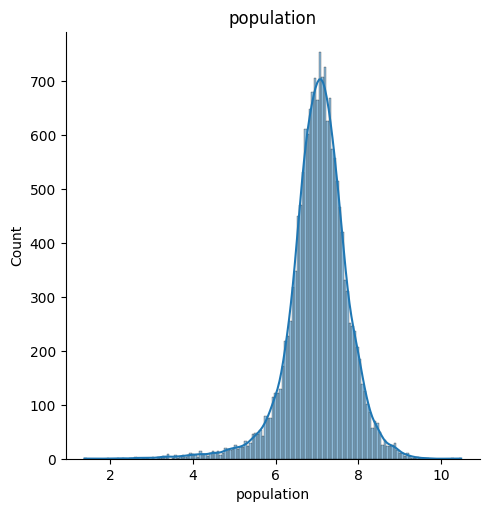

<Figure size 1000x600 with 0 Axes>

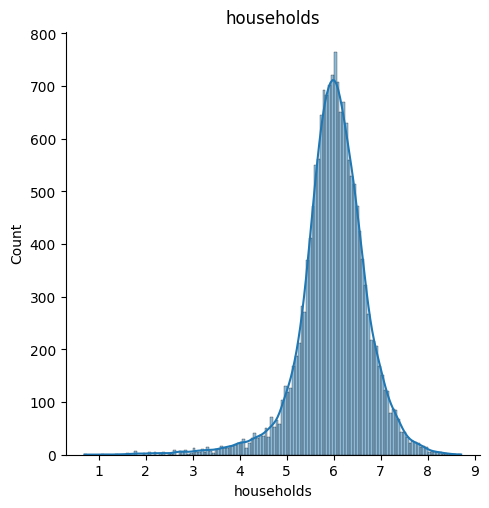

<Figure size 1000x600 with 0 Axes>

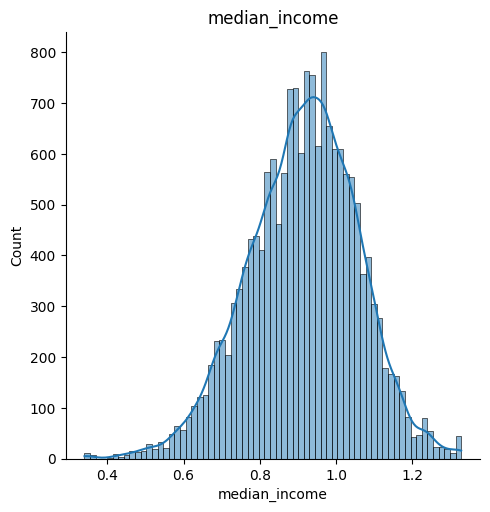

<Figure size 1000x600 with 0 Axes>

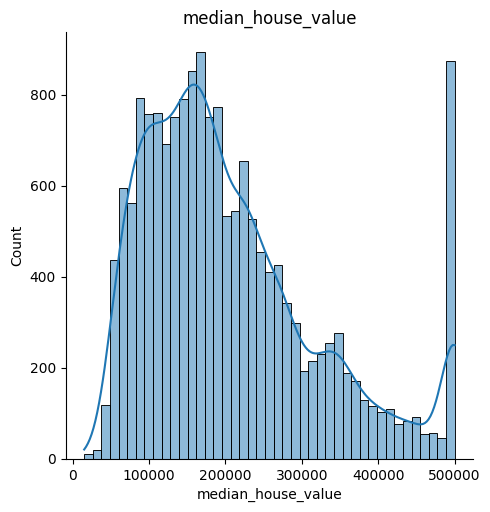

In [62]:
for col in df.columns:
  plt.figure(figsize=(10,6))
  sns.displot(df[col],kde=True)
  plt.xlabel(col)
  plt.title(col)
  plt.show()

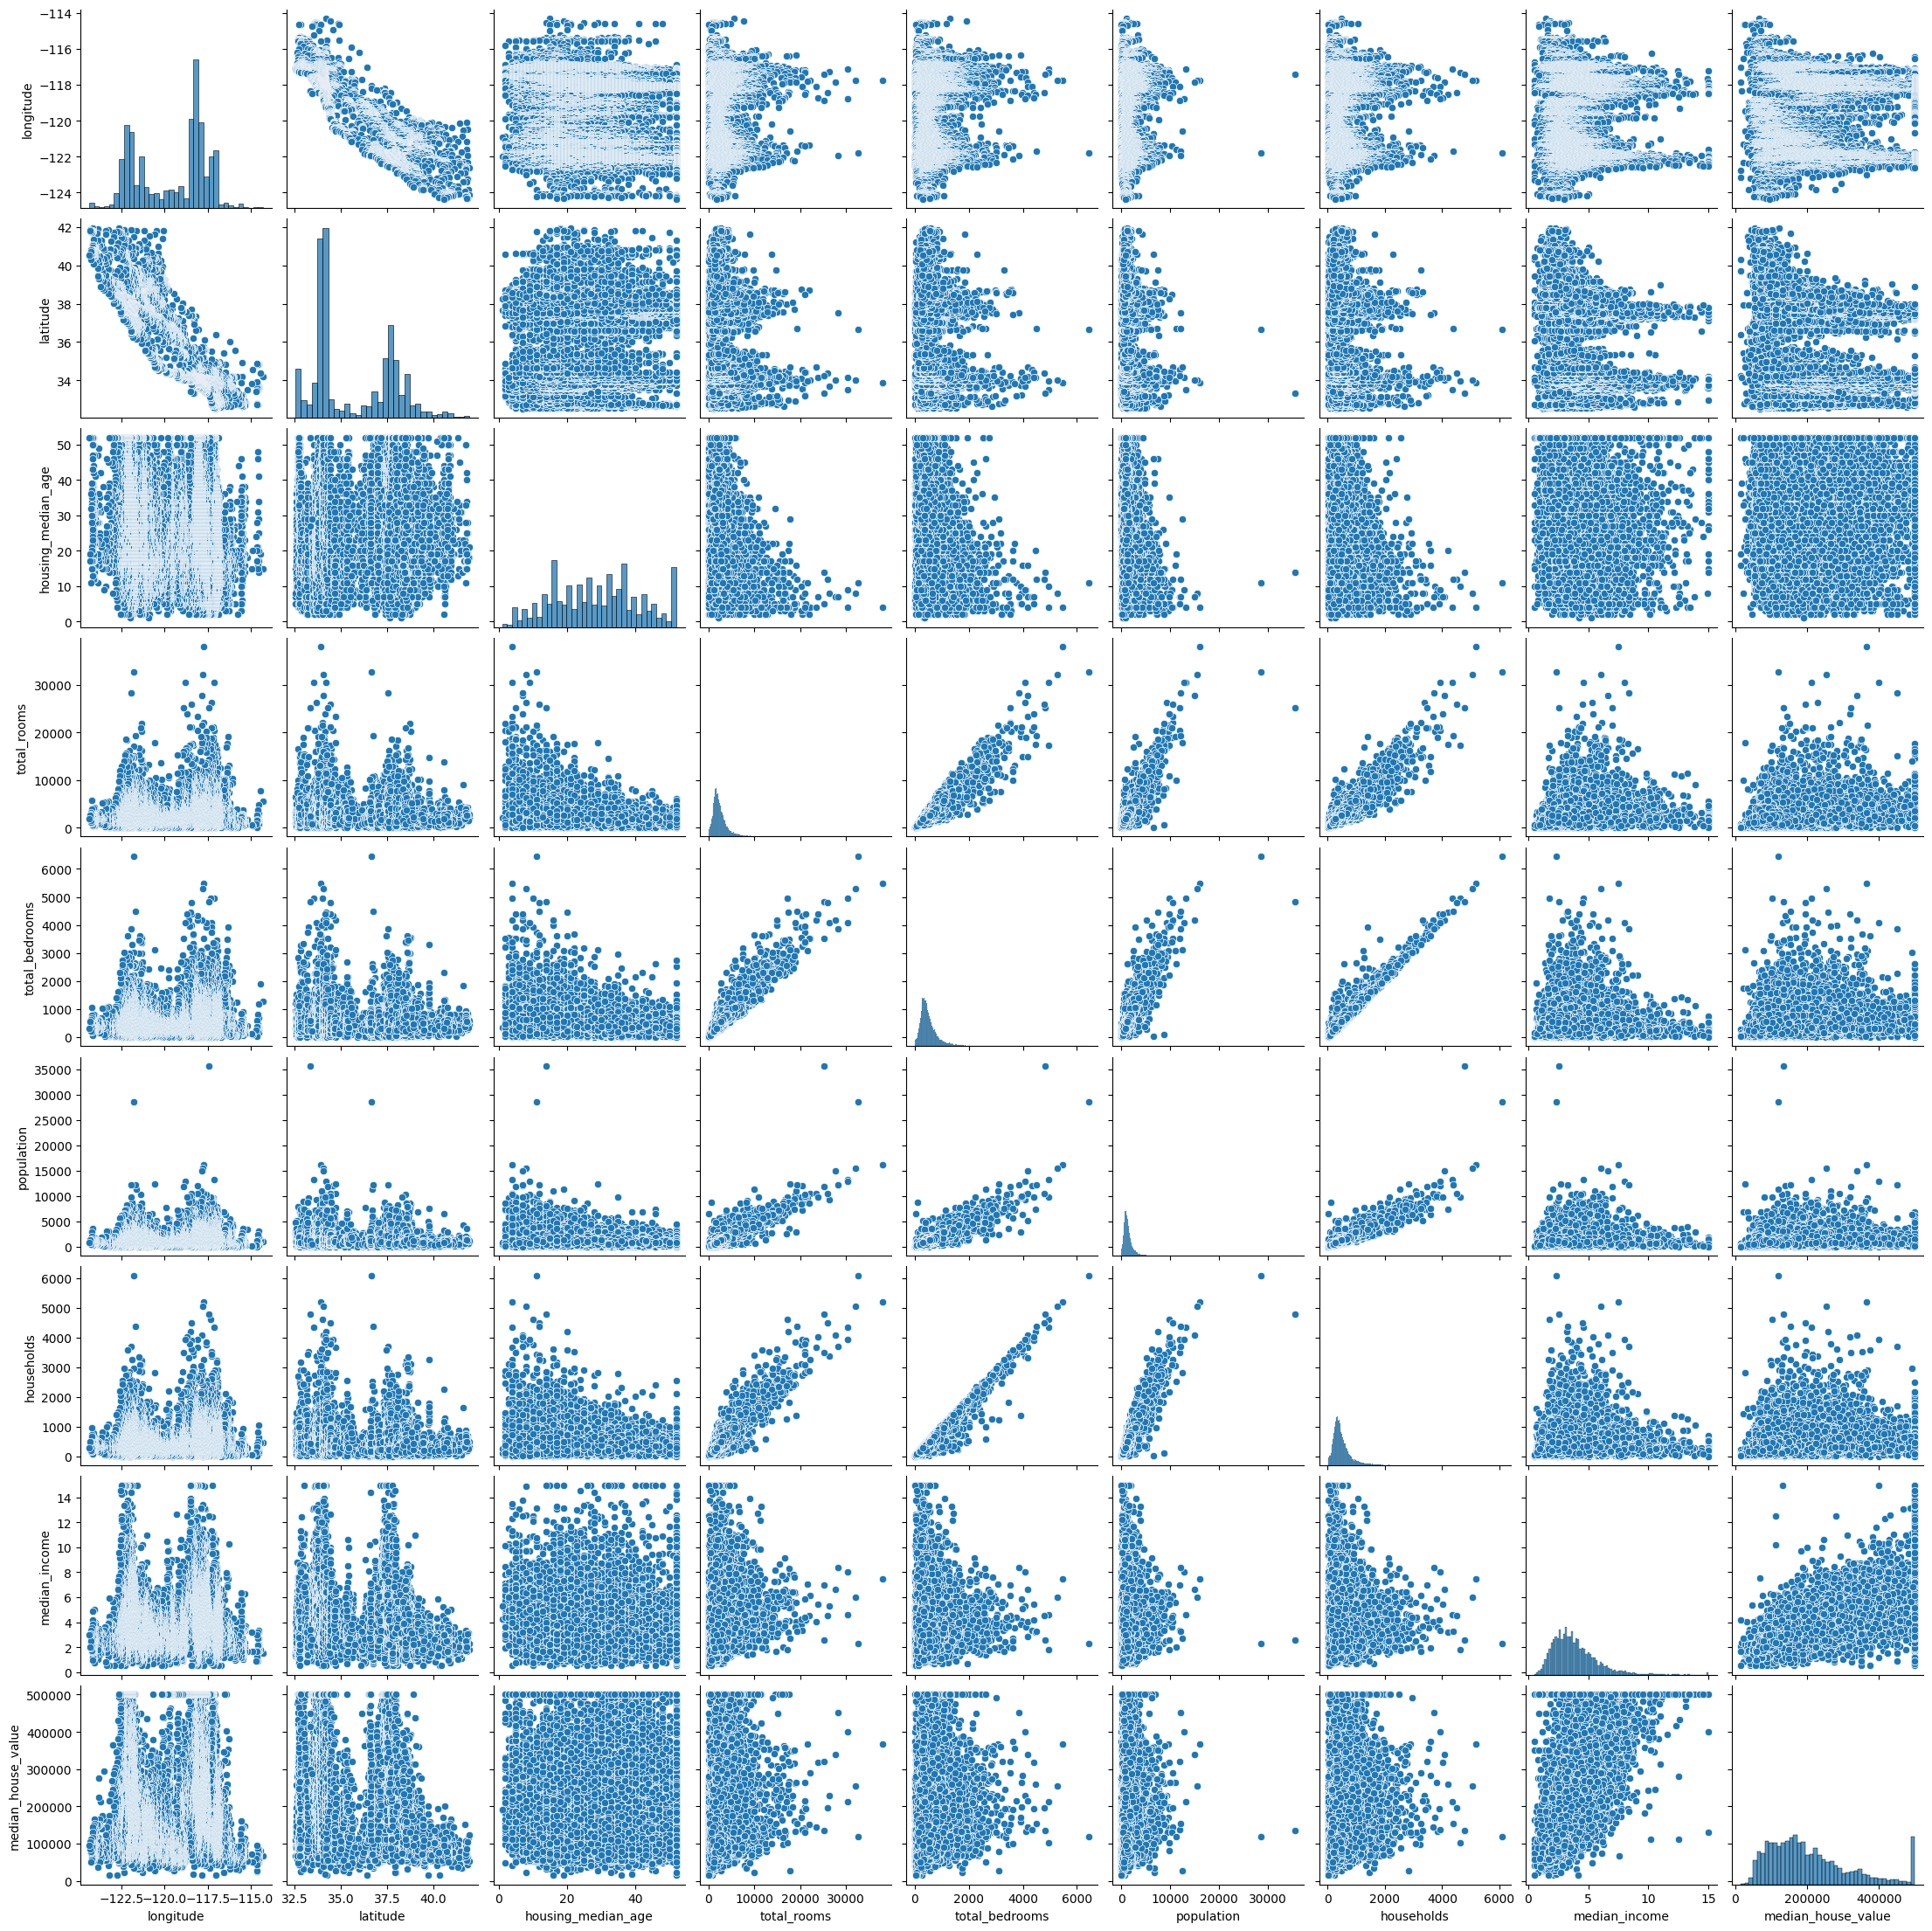

In [26]:
sns.pairplot(df)

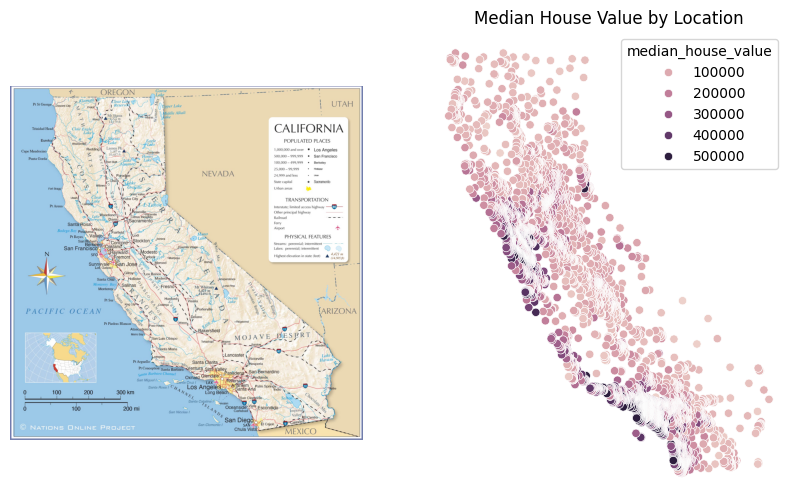

In [36]:
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
img = plt.imread('/content/California_map-L.jpg')
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
sns.scatterplot(x='longitude', y='latitude', hue='median_house_value', data=df)
plt.title('Median House Value by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.axis('off')
plt.show()


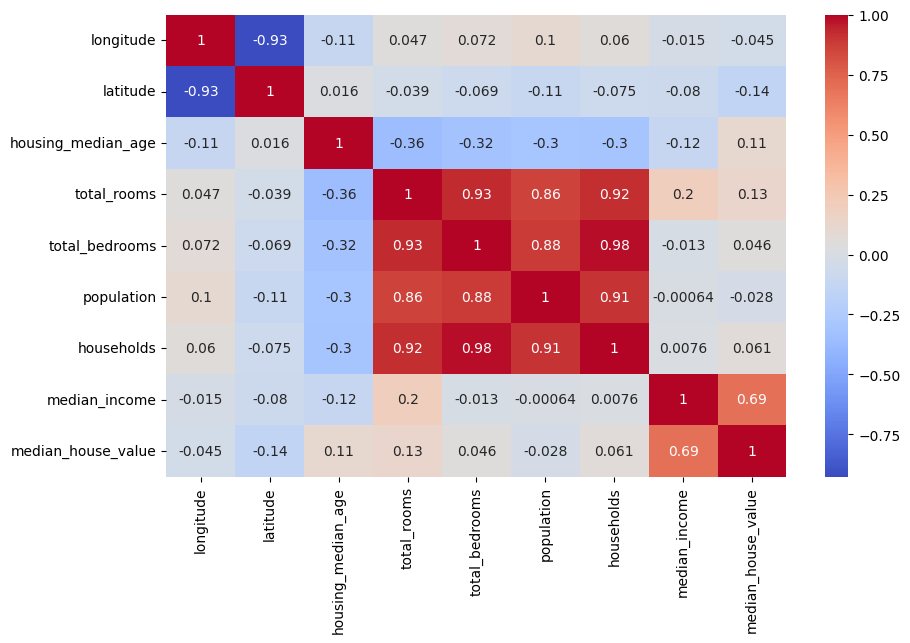

In [37]:
corr_matrix=df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()

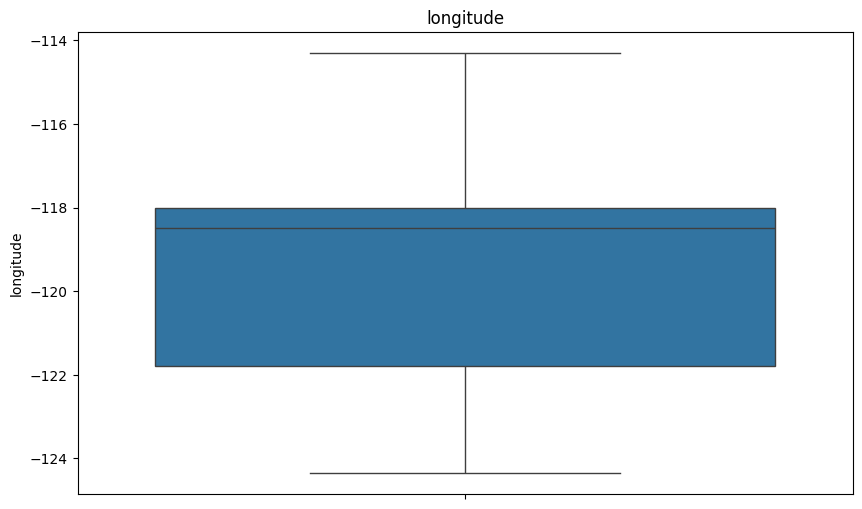

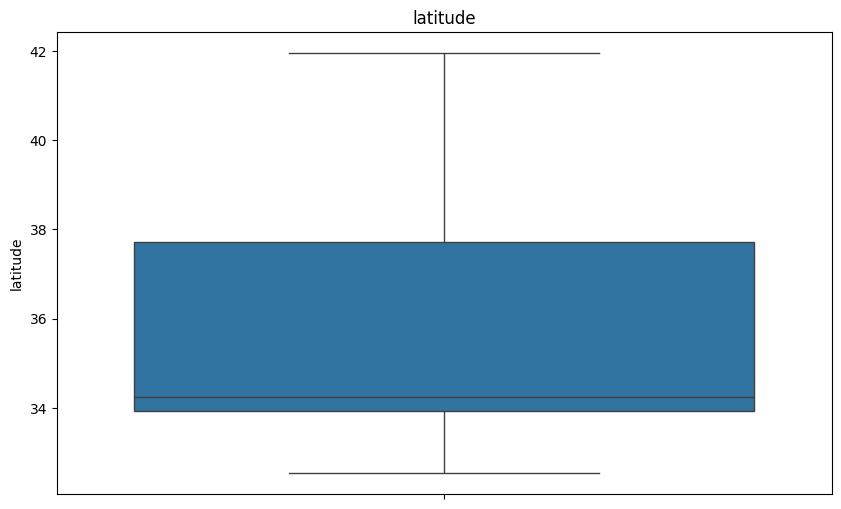

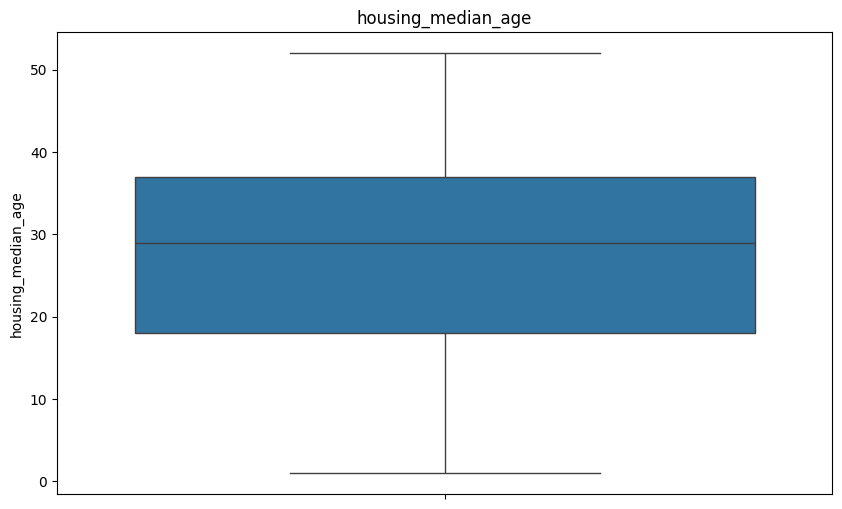

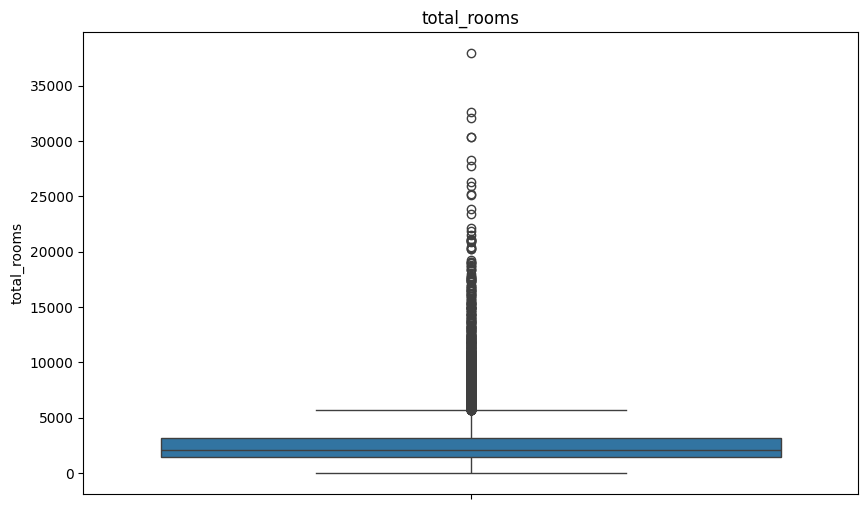

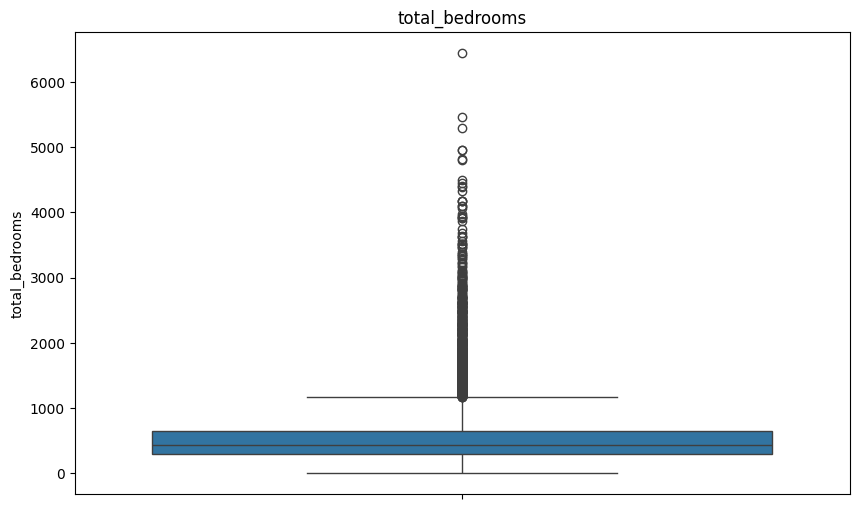

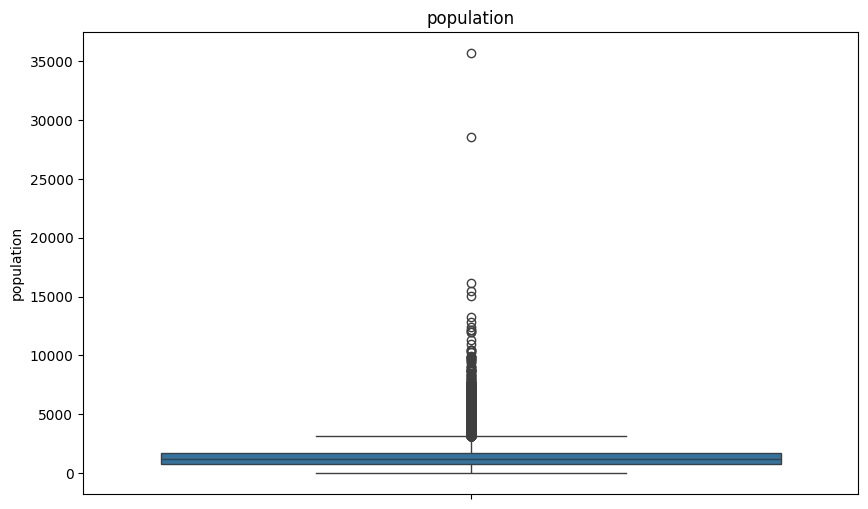

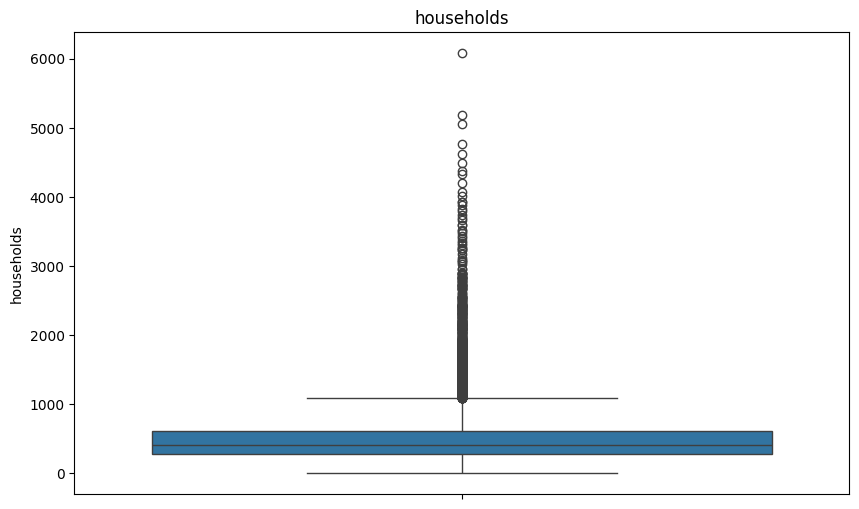

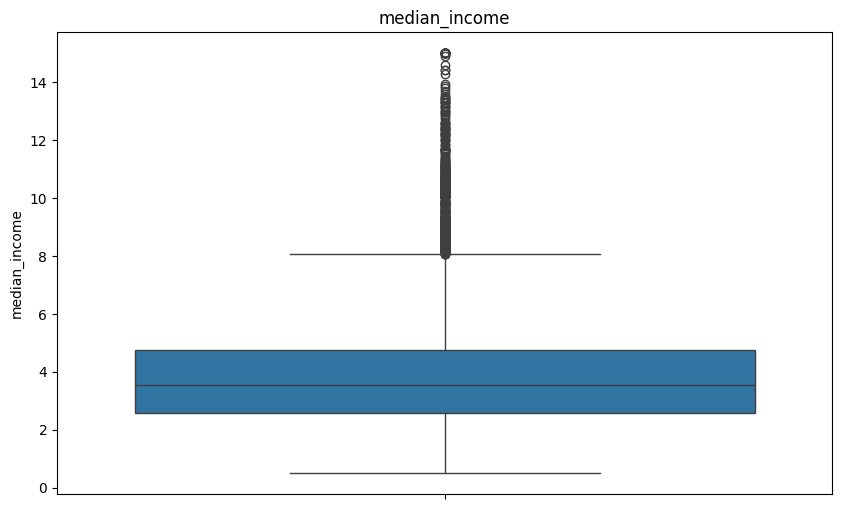

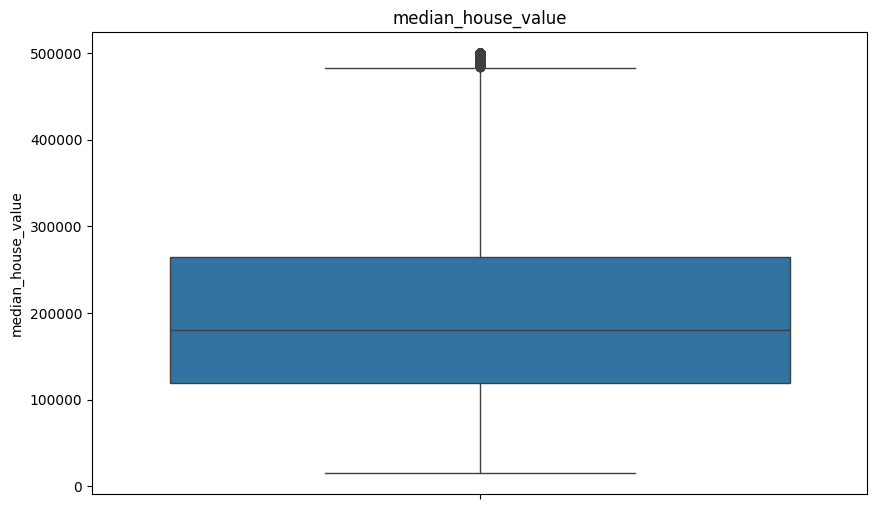

In [39]:
for col in df.columns:
  plt.figure(figsize=(10,6))
  sns.boxplot(df[col])
  plt.title(col)
  plt.show()

In [41]:
columns=['total_rooms','total_bedrooms','population','households','median_income']
for col in columns:
  df[col]=np.log1p(df[col])
df[col]=df[col].apply(lambda x:np.log1p(x))

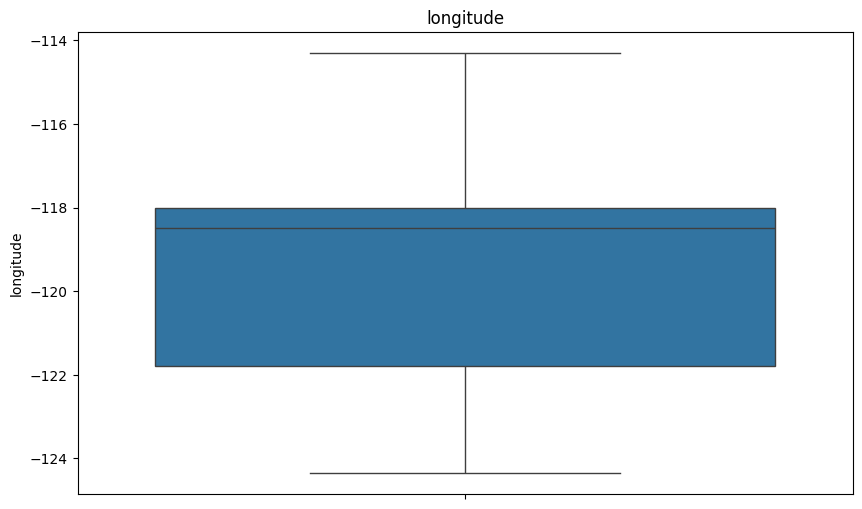

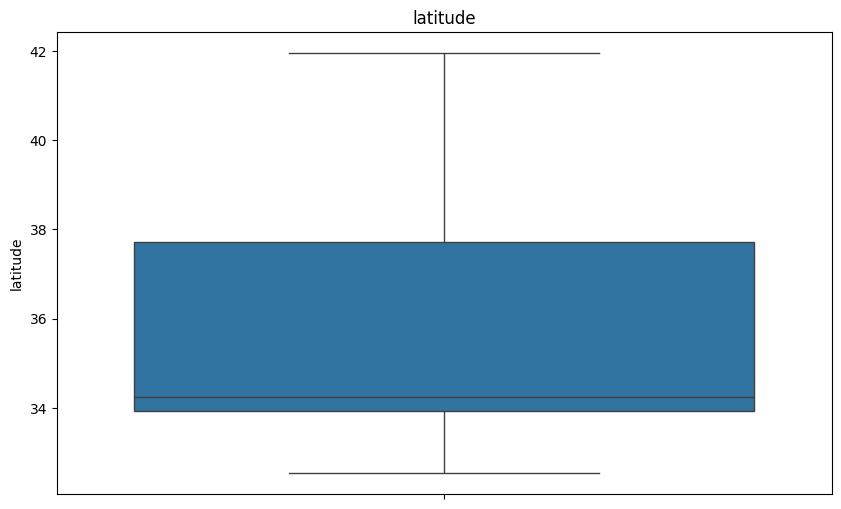

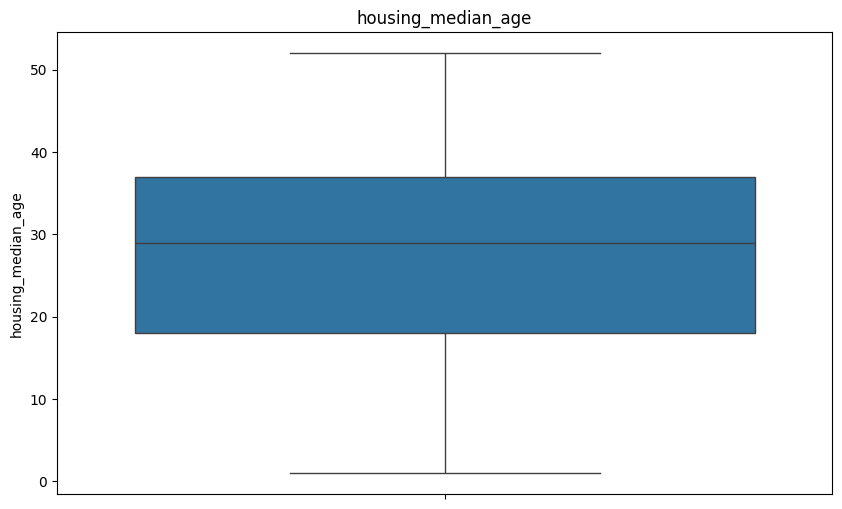

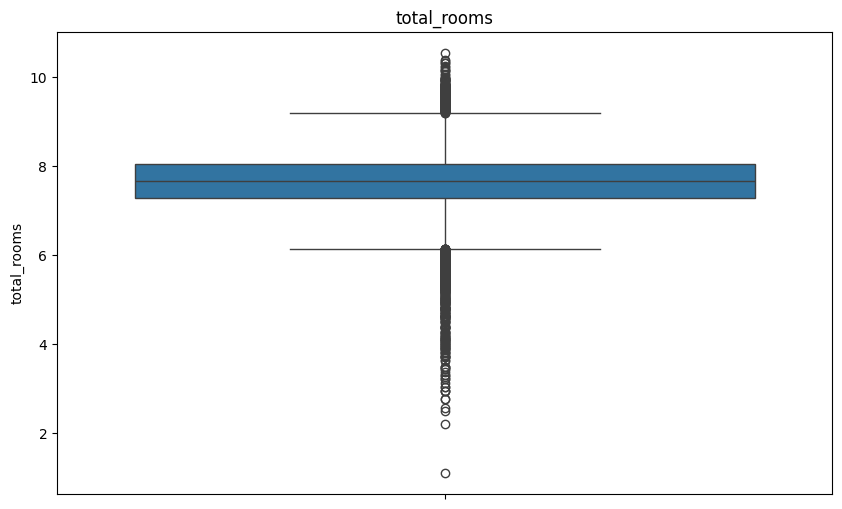

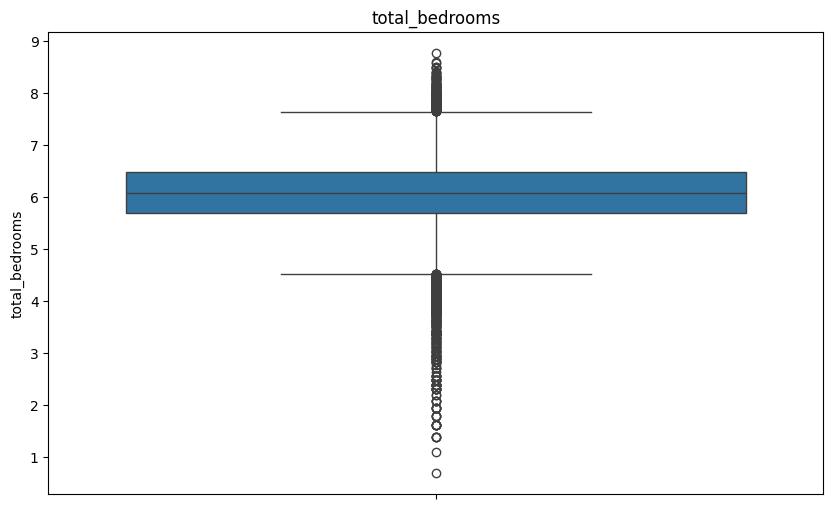

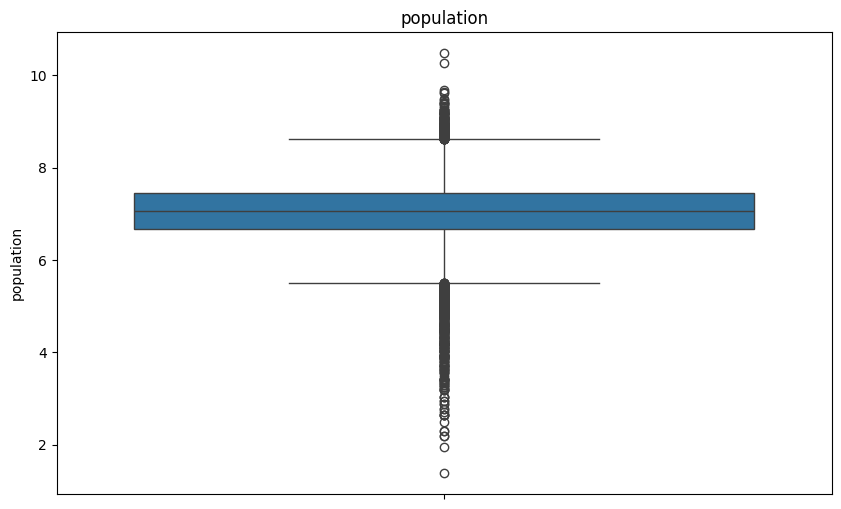

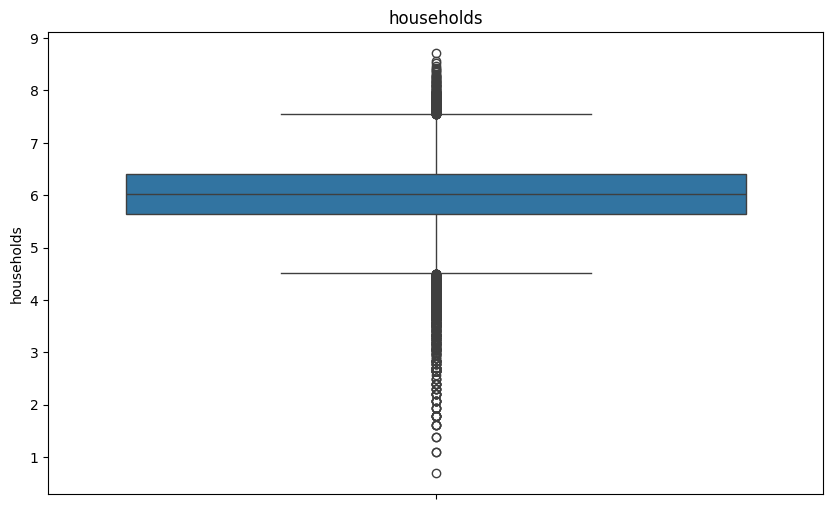

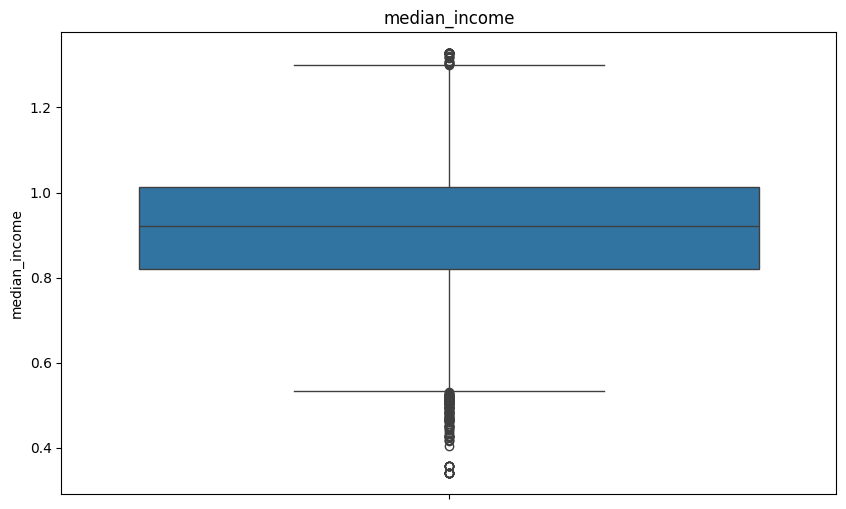

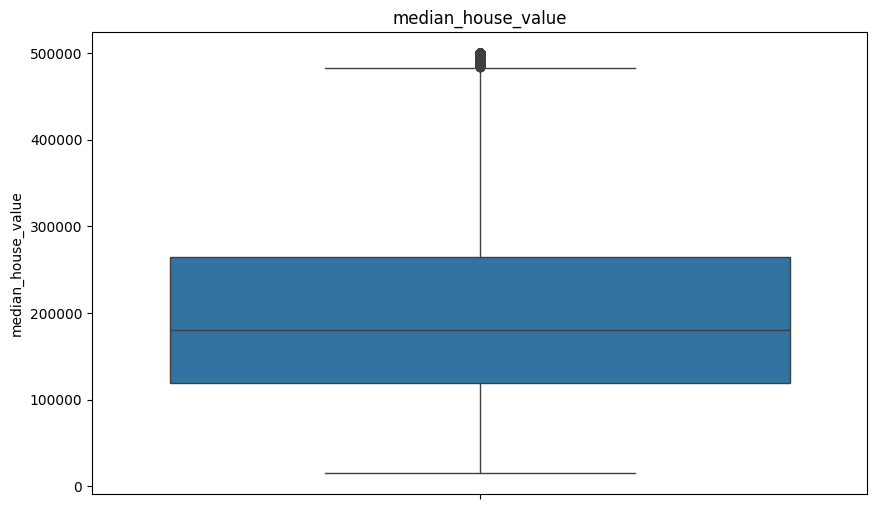

In [43]:
for col in df.columns:
  plt.figure(figsize=(10,6))
  sns.boxplot(df[col])
  plt.title(col)
  plt.show()

In [44]:
X=df.drop('median_house_value',axis=1)
y=df['median_house_value']

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [46]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [47]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping

In [48]:
model=Sequential()
model.add(Dense(128,activation='relu',input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

In [49]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=10)

In [51]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])


In [52]:
history=model.fit(X_train,y_train,epochs=500,validation_split=0.2,callbacks=[early_stop])

Epoch 1/500
340/340 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 55907414016.0000 - mae: 205327.8438 - val_loss: 30680094720.0000 - val_mae: 138237.0312
Epoch 2/500
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 23031220224.0000 - mae: 116137.3828 - val_loss: 13533364224.0000 - val_mae: 89883.1641
Epoch 3/500
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 12474395648.0000 - mae: 84443.5391 - val_loss: 8499671552.0000 - val_mae: 69450.6172
Epoch 4/500
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8820631552.0000 - mae: 70066.5000 - val_loss: 6782596096.0000 - val_mae: 62446.7109
Epoch 5/500
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7431235072.0000 - mae: 64544.3711 - val_loss: 6124193792.0000 - val_mae: 58711.4648
Epoch 6/500
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7114886144.0000 - mae: 62045.2500 - val_loss: 5737851392.0000 - val_mae: 56628.9414
Epoch 7/500
340/340 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6696763392.0000 - mae: 60889.8281 - val_loss: 5441825280.0000

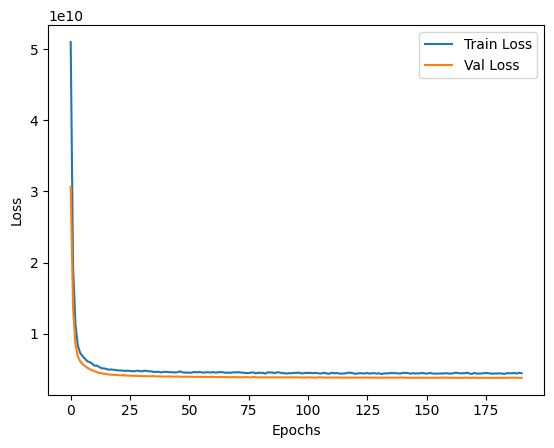

In [58]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [54]:
y_pred=model.predict(X_test)

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [55]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [56]:
MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
R2=r2_score(y_test,y_pred)

In [57]:
print(f'Mean Squared Error: {MSE}')
print(f'Mean Absolute Error: {MAE}')
print(f'R2 Score: {R2}')

Mean Squared Error: 3437383531.6204433
Mean Absolute Error: 40463.29748046875
R2 Score: 0.7505318670941297


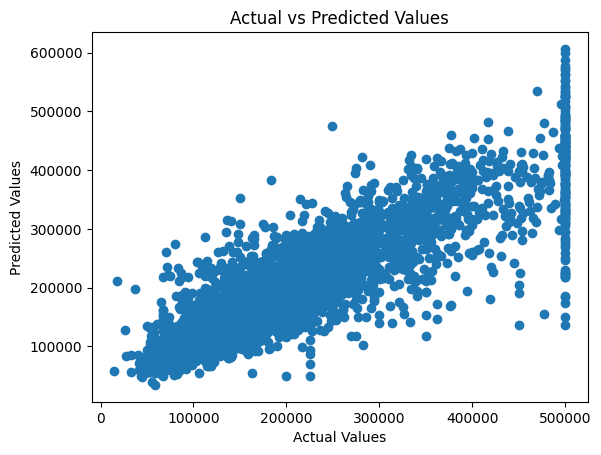

In [60]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()